In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import squareform, pdist

plt.style.use("./style.mplstyle")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from cycler import cycler
blues = ['#00153b', '#001f47', '#002953', '#00335f', '#003e6b', '#004977', '#005484', '#006090', '#006c9d', '#0078aa', '#0884b7', '#228fc3', '#369bd0', '#47a7dc', '#56b2e8', '#64bef5', '#72cbfe', '#81d9ff', '#90e6ff', '#9ef4ff']
reds = ['#35001e', '#520537', '#6a1d4c', '#813361', '#994976', '#b15f8d', '#c975a3', '#e28cbb', '#faa5d4', '#ffc5f5']
odours = ['#009e73', '#51aa6d', '#78b667', '#b6cd57', '#d3d84d', '#efe440']

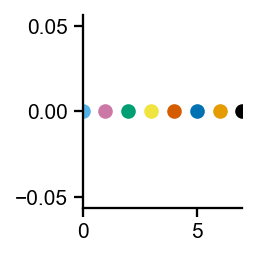

In [2]:
fig, ax = plt.subplots()
for i in range(len(colors)):
    ax.scatter(i, 0, color=colors[i])

In [3]:
def compact_svd(x):
    u, s, vt = np.linalg.svd(x, False)
    u = u[:, s > 1e-9]
    v = vt.T[:, s > 1e-9]
    s = np.diag(s[s > 1e-9])
    return u, s, v

In [56]:
x = np.asarray([[2.]])
y = np.asarray([[1.]])
xp = np.linalg.pinv(np.asarray([[x]]))
m, n, o = compact_svd(y @ x.T @ xp.T)

w1 = np.sqrt(n) @ o.T @ xp
w2 = m @ np.sqrt(n)

print(w1, w2)

w2 @ w1 @ x

[[[[0.5]]]] [[1.]]


array([[[[1.]]]])

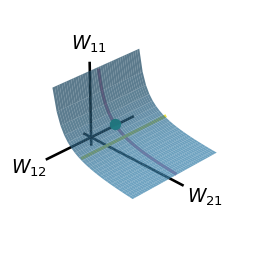

In [55]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure(constrained_layout=True).add_subplot(projection='3d')
ax.view_init(30, -45)

X = np.arange(0.25, 2.5, 0.1)
Y = np.arange(-2., 2., 0.1)
X, Y = np.meshgrid(X, Y)
Z = .5 / X

ax.plot_surface(X, Y, Z, alpha=0.75, color=colors[0])

x = np.linspace(0.26, 2.4, 1000)
y = np.zeros(1000)
z = .5 / x

ax.plot(x, y, z, zorder=1, color=colors[1], alpha=1.)
ax.scatter(np.sqrt(0.5), 0., np.sqrt(0.5), c=colors[2], zorder=2)

# ax.scatter(1., 0., 0.5, c="green", zorder=2)
x = np.ones(1000)
y = np.linspace(-1.9, 1.9, 1000)
z = np.ones(1000) * 0.5
ax.plot(x, y, z, zorder=1, c=colors[3], alpha=1.)

# X-Axis
x = [-0.2, 2.6]
y = np.zeros(2)
z = np.zeros(2)
ax.plot(x, y, z, c="k", lw=1.25, zorder=0)
ax.text(3.2, 0, 0, "$W_{21}$", ha="center", va="center", fontsize=9.)

# Y-Axis
x = np.zeros(2)
y = [-2, 2]
z = np.zeros(2)
ax.plot(x, y, z, c="k", lw=1.25, zorder=0)
ax.text(0., -2.8, 0, "$W_{12}$", ha="center", va="center", fontsize=9.)

# Z-Axis
x = np.zeros(2)
y = np.zeros(2)
z = np.asarray([-0.2, 2.])
ax.plot(x, y, z, c="k", lw=1.25, zorder=0)
ax.text(0., 0., 2.5, "$W_{11}$", ha="center", va="center", fontsize=9.)

ax.axis('off')

plt.savefig("../results/fig1/solution-manifold.svg", dpi=300)

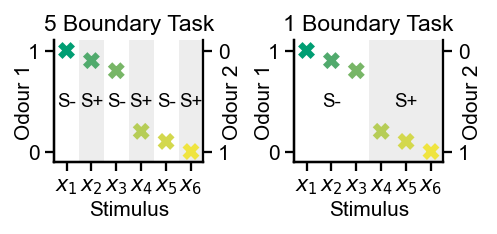

In [6]:
xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.],
    np.zeros(6)
]) / 100.

fig, axs = plt.subplots(1, 2, figsize=(1.6*2, 1.45), constrained_layout=True)

for i in range(2):
    ax = axs[i]
    ax.scatter(range(6), xs[0], zorder=10, color=odours, marker="x", lw=3)
    # ax.scatter(range(6), xs[1], zorder=0)
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0, 1])
    ax.set_yticklabels([0, 1])
    
    ax.spines['right'].set_visible(True)
    ax2 = ax.twinx()
    ax2.set_ylim(1.1, -0.1)
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels([0, 1])
    ax.set_ylabel("Odour 1", labelpad=-3)
    ax2.set_ylabel("Odour 2", labelpad=-3)

ax = axs[0]
for i in range(1, 7, 2):
    ax.axvspan(i-0.5, i+0.5, color="k", alpha=0.07, zorder=2, lw=0)
    ax.text(i, 0.5, "S+", ha="center", va="center", fontsize=9)
for i in range(0, 6, 2):
    ax.text(i, 0.5, "S-", ha="center", va="center", fontsize=9)

ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])

ax.set_xlabel("Stimulus")
ax.set_title("5 Boundary Task")

ax = axs[1]
ax.axvspan(2.5, 6.5, color="k", alpha=0.07, zorder=2, lw=0)
ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])

ax.set_xlabel("Stimulus")

ax.set_ylabel("Odour 1")
ax2.set_ylabel("Odour 2")
ax.set_title("1 Boundary Task")

ax.text(1, 0.5, "S-", ha="center", va="center", fontsize=9)
ax.text(4, 0.5, "S+", ha="center", va="center", fontsize=9)

plt.savefig("./figures/2d.svg", dpi=300)

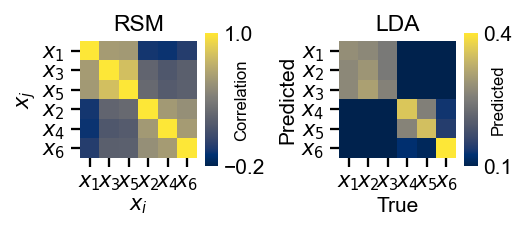

In [4]:
# Data source: https://github.com/MizrahiTeam/Kudryavitskaya-et-al.-2020-/blob/main/Figure_5/5K_M.xlsx
fig, axs = plt.subplots(1, 2, figsize=(1.7*2, 1.7), constrained_layout=True)

task_1 = """1	0.599732106435705	0.522830034223153	0.222045427182833	0.217830018729568	-0.0133054392856377
0.599732106435705	1	0.586233215059026	0.193229554683793	0.162414725385535	-0.0765674151896875
0.522830034223153	0.586233215059026	1	0.286583262346625	0.251185421634389	-0.0594038234957483
0.222045427182833	0.193229554683793	0.286583262346625	1	0.802187780983927	0.587340754326303
0.217830018729568	0.162414725385535	0.251185421634389	0.802187780983927	1	0.600151353473822
-0.0133054392856377	-0.0765674151896875	-0.0594038234957483	0.587340754326303	0.600151353473822	1"""
task_1 = np.asarray([float(f) for f in task_1.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)

ax = axs[0]
cbax = ax.imshow(np.rot90(task_1, 2), vmin=-0.2, vmax=1.)
xs = [1, 3, 5, 2, 4, 6]
ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i}$" for i in xs])
ax.set_yticks(range(6))
ax.set_yticklabels([f"$x_{i}$" for i in xs])
ax.set_title("RSM")
ax.set_xlabel("$x_i$")
ax.set_ylabel("$x_j$")

cb = fig.colorbar(cbax, shrink=0.55, aspect=10, pad=0.06, ax=ax)
cb.outline.set_visible(False)
cb.set_ticks([-0.2, 1])
cb.ax.tick_params(length=0)
cb.set_label("Correlation", labelpad=-15., fontsize=8)


task_2 = """0.56	0.11	0.12333333	0.06333333	0.08333333	0.06
0.14666667	0.35	0.26333333	0.08	0.09	0.07
0.13333333	0.25666667	0.36	0.06666667	0.09666667	0.08666667
0.02666667	0.06333333	0.07333333	0.26	0.30666667	0.27
0.03666667	0.08	0.07666667	0.24666667	0.29	0.27
0.05666667	0.07666667	0.07	0.24666667	0.27	0.28"""

task_2 = np.asarray([float(f) for f in task_2.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)

ax = axs[1]
cbax = ax.imshow(np.rot90(task_2, 2), vmin=0.1, vmax=0.4)
ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])
ax.set_yticks(range(6))
ax.set_yticklabels([f"$x_{i+1}$" for i in range(6)])

cb = fig.colorbar(cbax, shrink=0.55, aspect=10, pad=0.06, ax=ax)
cb.outline.set_visible(False)
cb.set_ticks([0.1, 0.4])
cb.ax.tick_params(length=0)
cb.set_label("Predicted", labelpad=-10., fontsize=8)
ax.set_title("LDA")
ax.set_ylabel("Predicted")
ax.set_xlabel("True")

for i in range(2):
    axs[i].spines[["bottom", "left"]].set_visible(False)

plt.savefig("./figures/2/e.svg", dpi=300)

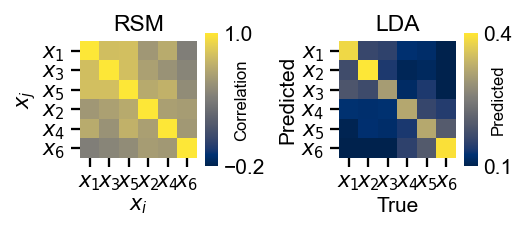

In [5]:
# Data source: https://github.com/MizrahiTeam/Kudryavitskaya-et-al.-2020-/blob/main/Figure_5/5K_M.xlsx
fig, axs = plt.subplots(1, 2, figsize=(1.7*2, 1.7), constrained_layout=True)

task_1 = """1	0.581592832382913	0.602433971357336	0.504840667890564	0.463333749957928	0.422423926082791
0.581592832382913	1	0.620445401435432	0.726100838220784	0.543012033046722	0.686335631336302
0.602433971357336	0.620445401435432	1	0.684040293578531	0.627773342116505	0.574019286686814
0.504840667890564	0.726100838220784	0.684040293578531	1	0.79873577254681	0.799957264274821
0.463333749957928	0.543012033046722	0.627773342116505	0.79873577254681	1	0.796405860575466
0.422423926082791	0.686335631336302	0.574019286686814	0.799957264274821	0.796405860575466	1"""
task_1 = np.asarray([float(f) for f in task_1.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)

ax = axs[0]
cbax = ax.imshow(np.rot90(task_1, 2), vmin=-0.2, vmax=1.)
xs = [1, 3, 5, 2, 4, 6]
ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i}$" for i in xs])
ax.set_yticks(range(6))
ax.set_yticklabels([f"$x_{i}$" for i in xs])
ax.set_title("RSM")
ax.set_xlabel("$x_i$")
ax.set_ylabel("$x_j$")

cb = fig.colorbar(cbax, shrink=0.55, aspect=10, pad=0.06, ax=ax)
cb.outline.set_visible(False)
cb.set_ticks([-0.2, 1])
cb.ax.tick_params(length=0)
cb.set_label("Correlation", labelpad=-15., fontsize=8)


task_2 = """0.39266667	0.196	0.15333333	0.10066667	0.07666667	0.08066667
0.19733333	0.31866667	0.138	0.11933333	0.12266667	0.104
0.14533333	0.162	0.31733333	0.12666667	0.12133333	0.12733333
0.08666667	0.14	0.116	0.30066667	0.16933333	0.18733333
0.06666667	0.112	0.108	0.14	0.40133333	0.172
0.056	0.11933333	0.12533333	0.154	0.16333333	0.382"""


task_2 = np.asarray([float(f) for f in task_2.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)

ax = axs[1]
cbax = ax.imshow(np.rot90(task_2, 2), vmin=0.1, vmax=0.4)
ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])
ax.set_yticks(range(6))
ax.set_yticklabels([f"$x_{i+1}$" for i in range(6)])

cb = fig.colorbar(cbax, shrink=0.55, aspect=10, pad=0.06, ax=ax)
cb.outline.set_visible(False)
cb.set_ticks([0.1, 0.4])
cb.ax.tick_params(length=0)
cb.set_label("Predicted", labelpad=-10., fontsize=8)
ax.set_title("LDA")
ax.set_ylabel("Predicted")
ax.set_xlabel("True")

for i in range(2):
    axs[i].spines[["bottom", "left"]].set_visible(False)

plt.savefig("./figures/2/m.svg", dpi=300)

In [6]:
def compact_svd(x):
    u, s, vt = np.linalg.svd(x, False)
    u = u[:, s > 1e-9]
    v = vt.T[:, s > 1e-9]
    s = np.diag(s[s > 1e-9])
    return u, s, v

In [48]:
"""
xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.],
]) / 100.
xs = np.vstack([xs, np.identity(6), np.zeros((8, 6))])
"""
xs = np.vstack([np.identity(4), np.zeros((2, 4))])
"""
xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.],
    np.zeros(6),
    np.zeros(6)
]) / 100.
"""

#ys = np.ones((1, 4))
#ys[:, :3] = -1.

ys = np.random.normal(0., 1., (2, 4))

in_dim = xs.shape[0]
hidden_dim = 4
out_dim = 2

steps = 501

In [115]:
np.random.seed(2)

w1 = np.random.normal(0., 1. / np.sqrt(in_dim), (hidden_dim, in_dim))
w2 = np.random.normal(0., 1. / np.sqrt(hidden_dim), (out_dim, hidden_dim))

alpha = 0.0125

w1s = []
w2s = []
hs = []
for i in range(steps*2 - 1):
    w1 = (1. - alpha) * w1 + alpha * np.random.normal(0., 5., w1.shape)
    w2 = (1. - alpha) * w2 + alpha * np.random.normal(0., 5., w2.shape)
    for _ in range(1000):
        dw1 = w2.T @ (w2 @ w1 @ xs - ys) @ xs.T
        dw2 = (w2 @ w1 @ xs - ys) @ xs.T @ w1.T
        w1 -= 0.01 * dw1
        w2 -= 0.01 * dw2
    
    if i >= steps - 1:
        w1s.append(w1)
        hs.append(w1 @ xs)
        w2s.append(w2)

w1s1 = np.asarray(w1s)
hs1 = np.asarray(hs)
w2s1 = np.asarray(w2s)

In [134]:
# Diffusion on minimum-norm solution
np.random.seed(1)

alpha = 0.0125 / 2.

u_, s_, v_ = compact_svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))
r_ = np.random.normal(0., 1., (hidden_dim, 2))

w1s = []
w2s = []
hs = []
eta = 0.1
for i in range(steps*2 - 1):
    r_ = (1. - alpha) * r_ + alpha * np.random.normal(0., 3., r_.shape)
    r1, _, r2 = np.linalg.svd(r_, False)
    r = r1 @ r2
    w1 = r @ np.sqrt(s_) @ v_.T
    w2 = u_ @ np.sqrt(s_) @ r.T
    
    if i >= steps - 1:
        w1s.append(w1)
        hs.append(w1 @ xs)
        w2s.append(w2)

w1s3 = np.asarray(w1s)
hs3 = np.asarray(hs)
w2s3 = np.asarray(w2s)

In [128]:
step_size = 1
similarities = squareform(pdist(hs1[::step_size].swapaxes(1, 2).reshape(-1, hidden_dim), "euclidean"))
embedding = MDS(n_components=2, dissimilarity="precomputed", eps=0.0001, n_jobs=-1, random_state=2, normalized_stress="auto")
mds = embedding.fit_transform(similarities).reshape(-1, 4, 2)

In [135]:
drs = []
for i, (w1s, hs, w2s) in enumerate([[w1s1, hs1, w2s1], [w1s3, hs3, w2s3]]):
    w1 = w1s[0]
    w2 = ys @ xs.T @ w1.T @ np.linalg.pinv(w1 @ xs @ xs.T @ w1.T)
    loss = []
    for t in range(steps):
        loss.append(0.5 * 1. / 4 * np.linalg.norm(w2 @ w1s[t] @ xs - ys)**2)
    drs.append(loss)

In [165]:
np.linalg.svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))[2].shape

(6, 6)

In [186]:
d = []
u_, s_, v_ = compact_svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))

#u, s, vt = np.linalg.svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))
#s_ = np.diag(s)
#v_ = vt.T[:, :2]

for t in range(steps):
    q = w1s1[t] @ v_ @ np.diag(np.sqrt(1. / np.diag(s_)))
    d.append(np.linalg.norm(q.T @ q - np.identity(2), ord="fro")**2)
    #rsm = w1s1[t].T @ w1s1[t]
    #d.append(np.linalg.norm(rsm - v_ @ s_ @ v_.T)**2)
    #d.append(np.linalg.norm(w1s1[t])**2 + np.linalg.norm(w2s1[t])**2)

In [217]:
# Input noise
s1 = .47
ns = 5000
input_noise = []
for i, (w1s, hs, w2s) in enumerate([[w1s1, hs1, w2s1], [w1s3, hs3, w2s3]]):
    res = []
    fs = np.einsum("toh,thi->toi", w2s, w1s)
    for t in range(steps):
        losses = []
        xs_ = xs[:, :, None] + np.random.normal(0., np.sqrt(s1), xs.shape + (ns, ))
        ys_ = np.einsum("oi,ibn->obn", fs[t], xs_)
        res.append(0.5 * np.mean(np.linalg.norm(ys_ - ys[:, :, None], axis=0)**2))
    input_noise.append(res)

In [213]:
# Parameter noise
s1 = 0.15
s2 = 0.75
ns = 1000
parameter_noise = []
for i, (w1s, hs, w2s) in enumerate([[w1s1, hs1, w2s1], [w1s3, hs3, w2s3]]):
    res = []
    for t in range(steps):
        losses = []
        w1s_ = w1s[t, :, :, None] + np.random.normal(0., np.sqrt(s1), w1s.shape[1:] + (ns, ))
        w2s_ = w2s[t, :, :, None] + np.random.normal(0., np.sqrt(s2), w2s.shape[1:] + (ns, ))
        fs = np.einsum("ohn,hin->oin", w2s_, w1s_)
        ys_ = np.einsum("oin,ib->obn", fs, xs)
        res.append(0.5 * np.mean(np.linalg.norm(ys_ - ys[:, :, None], axis=0)**2))
    parameter_noise.append(res)

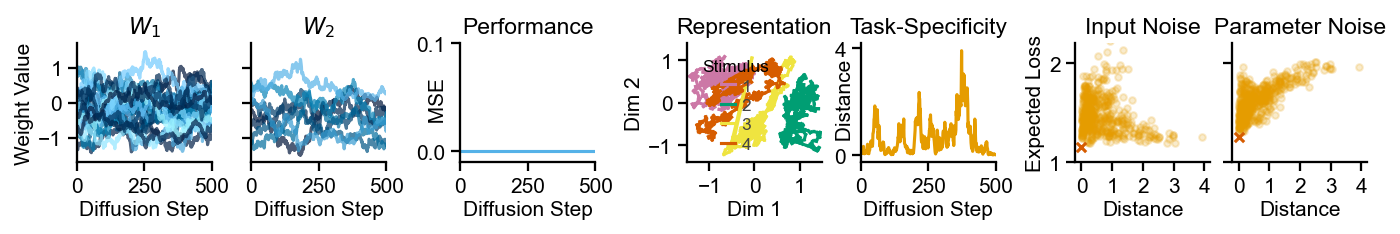

In [229]:
fig, axs = plt.subplots(1, 7, figsize=(1.3*7, 1.45))
ax = axs[0]
ax.set_prop_cycle(cycler(color=blues))
ax.plot(w1s1.reshape(steps, -1), alpha=0.7)
ax.set_ylim(-1.7, 1.7)
ax.set_yticks([-1., 0, 1.])
ax.set_title("$W_1$")
ax.set_ylabel("Weight Value")
ax.set_xlabel("Diffusion Step")

ax = axs[1]
ax.set_prop_cycle(cycler(color=blues[::2]))
ax.plot(w2s1.reshape(steps, -1), alpha=0.7)
ax.set_ylim(-1.7, 1.7)
ax.set_yticks([-1., 0, 1.])
ax.set_yticklabels([])
ax.set_title("$W_2$")
ax.set_xlabel("Diffusion Step")

ax = axs[2]
ax.plot(np.mean(np.linalg.norm(np.einsum("abc,adb->adc", w1s1, w2s1) @ xs - ys, axis=1)**2, axis=1), c=colors[0])
ax.set_ylim(-0.01, 0.1)
ax.set_title("Performance")
ax.set_ylabel(" MSE", labelpad=-15)
ax.set_xlabel("Diffusion Step")

ax = axs[3]
ax.set_title("Representation")
for step in range(steps-1):
    for j in range(4):
        if step == 0:
            ax.plot(mds[step:step+2, j, 0], mds[step:step+2, j, 1], c=colors[j+1], label=j+1)
        else:
            ax.plot(mds[step:step+2, j, 0], mds[step:step+2, j, 1], c=colors[j+1])
lim = 1.5
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim+0.1, lim-0.1)
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.legend(title="Stimulus")

ax = axs[4]
ax.plot(d, c=colors[6])
ax.set_title("Task-Specificity")
ax.set_xlabel("Diffusion Step")
ax.set_ylabel(" Distance", labelpad=-10)
ax.set_yticks([0, 4])

ax = axs[5]
ax.scatter(d, np.asarray(input_noise[0])+0.03, s=10, c=[colors[-2]], alpha=0.2)
ax.scatter(0, input_noise[1][-1], s=20, c=colors[-4], marker="x")
ax.set_title("Input Noise")
ax.set_xlim(-0.2, 4.2)
ax.set_xticks(range(5))
ax.set_ylabel("Expected Loss")
ax.set_xlabel("Distance")
ax.set_ylim([1., 2.2])

ax = axs[6]
ax.scatter(d, parameter_noise[0], s=10, c=[colors[-2]], alpha=0.2)
ax.scatter(0, parameter_noise[1][-1], s=20, c=colors[-4], marker="x")
ax.set_title("Parameter Noise")
#ax.set_yticks([0.1, 0.15])
ax.set_ylim([1., 2.2])
ax.set_yticklabels([])
ax.set_xlim(-0.2, 4.2)
ax.set_xticks(range(5))
ax.set_xlabel("Distance")



plt.savefig("./figures/2f.svg", dpi=300)

In [10]:
# Diffusion on least squares solution manifold
np.random.seed(1)

alpha = 0.0125

u_, s_, v_ = np.linalg.svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))
g, _, _ = compact_svd(xs @ xs.T)
s__ = np.diag(np.concatenate([np.sqrt(s_), np.linalg.svd(np.random.normal(0., .3, (hidden_dim, in_dim)))[1][1:]]))

q = np.random.normal(0., .125, (hidden_dim, in_dim))
w2_null = np.random.normal(0., .5, (out_dim, hidden_dim))

w1s = []
w2s = []
hs = []
eta = 0.1
for i in range(steps*2 - 1):
    q = (1. - alpha) * q + alpha * np.random.normal(0., 3., q.shape)
    w1 = (q @ s__ @ v_) @ (g @ g.T)
    
    qinv = np.linalg.pinv(q)[[0], :]
    h, _, _ = compact_svd(w1 @ xs @ xs.T)
    w2_null = (1. - alpha) * w2_null + alpha * np.random.normal(0., 6., w2_null.shape)
    w2 = u_ @ np.sqrt(s_) @ qinv + w2_null @ (np.identity(h.shape[0]) - h @ h.T)
    
    if i >= steps - 1:
        w1s.append(w1)
        hs.append(w1 @ xs)
        w2s.append(w2)

w1s2 = np.asarray(w1s)
hs2 = np.asarray(hs)
w2s2 = np.asarray(w2s)

In [11]:
# Diffusion on minimum-norm solution
np.random.seed(1)

alpha = 0.0125

u_, s_, v_ = compact_svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))
r_ = np.random.normal(0., 1., (hidden_dim, 1))

w1s = []
w2s = []
hs = []
eta = 0.1
for i in range(steps*2 - 1):
    r_ = (1. - alpha) * r_ + alpha * np.random.normal(0., 6., r_.shape)
    r = np.linalg.svd(r_, False)[0]
    w1 = r @ np.sqrt(s_) @ v_.T
    w2 = u_ @ np.sqrt(s_) @ r.T
    
    if i >= steps - 1:
        w1s.append(w1)
        hs.append(w1 @ xs)
        w2s.append(w2)

w1s3 = np.asarray(w1s)
hs3 = np.asarray(hs)
w2s3 = np.asarray(w2s)

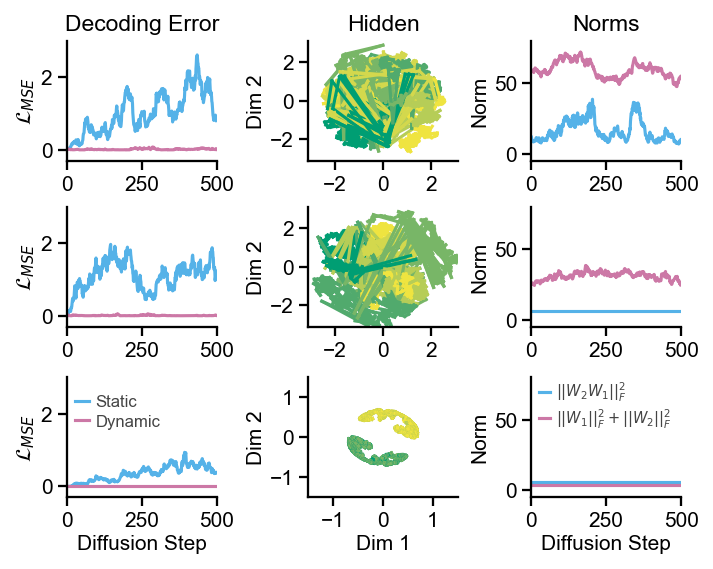

In [12]:
np.random.seed(1)
step_size = 1

fig, axss = plt.subplots(3, 3, figsize=(1.6*2.9, 1.6*2.3))

for i, (w1s, hs, w2s) in enumerate([[w1s1, hs1, w2s1], [w1s2, hs2, w2s2], [w1s3, hs3, w2s3]]):
    axs = axss[i]
    ax = axs[0]
    w = ys @ hs[0].T @ np.linalg.pinv(hs[0] @ hs[0].T)
    ax.plot(np.mean((np.einsum("ab,cbd->cd", w, hs) - ys)**2, axis=1), label="Static")
    
    decoding_errors = []
    for t in range(hs.shape[0]):
        w = ys @ hs[t].T @ np.linalg.pinv(hs[t] @ hs[t].T)
        decoding_errors.append(np.mean(w @ hs - ys)**2)
    ax.plot(decoding_errors, label="Dynamic")
    
    ax.set_ylim(-0.3, 3)
    if i == 2:
        leg = ax.legend(loc=[0., 0.5], fontsize=8., facecolor="white", framealpha=0.8, frameon=False)
        leg.get_frame().set_linewidth(0.0)
    
    
    if i == 0:
        ax.set_title("Decoding Error")
    ax.set_ylabel("$\mathcal{L}_{MSE}$")
    if i == 2:
        ax.set_xlabel("Diffusion Step")

    ax = axs[1]
    similarities = squareform(pdist(hs[::step_size].swapaxes(1, 2).reshape(-1, hidden_dim), "euclidean"))
    embedding = MDS(n_components=2, dissimilarity="precomputed", eps=0.1, n_jobs=4, random_state=1, normalized_stress="auto")
    mds = embedding.fit_transform(similarities).reshape(-1, 6, 2)
    for step in range(steps-1):
        for j in range(6):
            ax.plot(mds[step:step+2, j, 0], mds[step:step+2, j, 1], c=odours[j])
    if np.max(mds) > 2:
        ax.set_xlim(-3.1, 3.1)
        ax.set_ylim(-3.1, 3.1)
        ax.set_xticks([-2, 0, 2])
        ax.set_yticks([-2, 0, 2])
    else:
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
    ax.set_ylabel("Dim 2")
    if i == 0:
        ax.set_title("Hidden")
    if i == 2:
        ax.set_xlabel("Dim 1")

    ax = axs[2]
    network_norm = np.linalg.norm(np.einsum("abc,adb->adc", w1s, w2s), ord="fro", axis=(1,2))**2
    ax.plot(network_norm, label="$||W_2W_1||_F^2$")
    summed_norm = np.linalg.norm(w1s, ord="fro", axis=(1,2))**2 + np.linalg.norm(w2s, ord="fro", axis=(1,2))**2
    ax.plot(summed_norm - 1, label="$||W_1||_F^2 + ||W_2||_F^2$")
    # ax.set_ylim(-6.1, 4.1)
    # ax.set_yticks([-2.5, 0, 2.5])
    # max_val = np.max(np.concatenate([network_norm, summed_norm]))
    # ax.set_ylim(-0.1 * max_val, max_val * 1.1)
    ax.set_ylim(-5, 80)
    ax.set_ylabel("Norm")
    if i == 2:
        leg = ax.legend(loc=[0., 0.5], fontsize=7., facecolor="white", framealpha=0.8, frameon=False)
        leg.get_frame().set_linewidth(0.0)
    if i == 0:
        ax.set_title("Norms")
    if i == 2:
        ax.set_xlabel("Diffusion Step")

plt.savefig(f"./figures/2/g.svg", dpi=300)

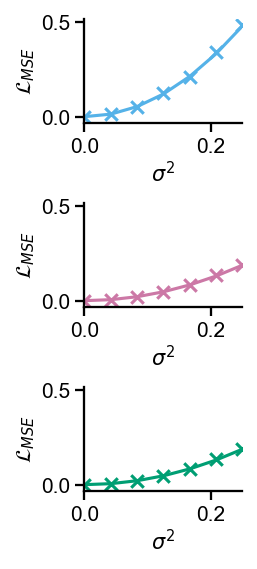

In [15]:
t = 100
trials_n = 1000
sigmas_n = 7
sigma_max = 0.25

fig, axs = plt.subplots(3, 1, sharey=True, figsize=(1.6, 1.6*2.3))
sigmas = np.linspace(0., sigma_max, sigmas_n)

for i, (w1s, hs, w2s) in enumerate([[w1s1, hs1, w2s1], [w1s2, hs2, w2s2], [w1s3, hs3, w2s3]]):
    ax = axs[i]
    np.random.seed(1)
    w1 = w1s[t]
    w2 = w2s[t]
    responses_mean = np.zeros(sigmas_n)
    responses_std = np.zeros(sigmas_n)
    for j, sigma in enumerate(sigmas):
        responses = []
        for trial in range(trials_n):
            xs_ = np.random.normal(0., sigma, xs.shape)
            responses.append(0.5 * np.mean(np.linalg.norm(w2 @ w1 @ (xs + xs_) - ys, axis=0)**2))
            
        responses_mean[j] = np.mean(responses)
        responses_std[j] = np.mean(responses)
    ax.scatter(sigmas, responses_mean, color=colors[i], marker="x")

    u, s, v = compact_svd(w2 @ w1)
    ax.plot(sigmas, 0.5 * sigmas**2 * np.linalg.norm(s)**2, color=colors[i])
    
    ax.set_xlabel("$\sigma^2$")
    ax.set_ylabel("$\mathcal{L}_{MSE}$")

In [ ]:
if rdm changes and sinsitivity to input noise changes -> least squares solution
if rdm changes but sensitivity to input noise stays steady -> least squares solution
if rdm steady and input noise stays steady -> minimum norm solution

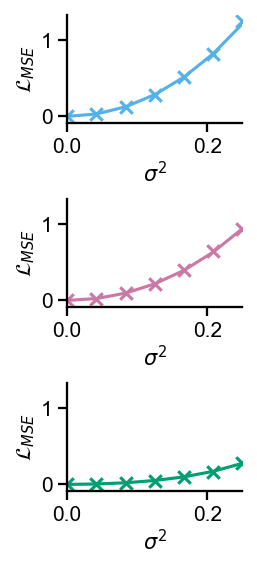

In [31]:
t = 100
trials_n = 1000
sigmas_n = 7
sigma_max = 0.25

fig, axs = plt.subplots(3, 1, sharey=True, figsize=(1.6, 1.6*2.3))
sigmas = np.linspace(0., sigma_max, sigmas_n)

for i, (w1s, hs, w2s) in enumerate([[w1s1, hs1, w2s1], [w1s2, hs2, w2s2], [w1s3, hs3, w2s3]]):
    ax = axs[i]
    np.random.seed(1)
    w1 = w1s[t]
    w2 = w2s[t]
    responses_mean = np.zeros(sigmas_n)
    responses_std = np.zeros(sigmas_n)
    for j, sigma in enumerate(sigmas):
        responses = []
        for trial in range(trials_n):
            w1_ = np.random.normal(0., sigma, w1.shape)
            w2_ = np.random.normal(0., sigma, w2.shape)
            responses.append(np.mean(np.linalg.norm((w2 + w2_) @ (w1 + w1_) @ xs - ys, axis=0)**2))
            
        responses_mean[j] = np.mean(responses)
        responses_std[j] = np.mean(responses)
    ax.scatter(sigmas, responses_mean, color=colors[i], marker="x")
    #ax.fill_between(sigmas, responses_mean - responses_std, responses_mean + responses_std, color=colors[i], alpha=0.2)

    k = xs.shape[-1]
    no, nh = w2.shape
    a = sigmas**2 * np.linalg.norm(w2)**2 * np.mean(np.diag(xs.T @ xs))
    b = no * sigmas**2 * 1. / k * np.trace(xs.T @ w1.T @ w1 @ xs)
    c = nh * no * sigmas**4 * np.mean(np.diag(xs.T @ xs))
    ax.plot(sigmas, a + b + c, color=colors[i])
    
    ax.set_xlabel("$\sigma^2$")
    ax.set_ylabel("$\mathcal{L}_{MSE}$")

In [22]:
l = 0.
for i in range(k):
    l += xs[:, i].T @ xs[:, i]
print(1. / k * l)
print(np.mean(np.diag(xs.T @ xs)))

1.0
1.0


In [21]:
(w2 @ w1 @ (xs + xs_) - ys).shape

(1, 6)

In [71]:
np.random.seed(1)

xs = np.random.normal(0., 1., (4, 3))
ys = np.random.normal(0., 1., (2, 3))

w1 = np.random.normal(0., 1., (9, 4))
w2 = np.random.normal(0., 1., (2, 9))

for _ in range(2000):
    w2 = w2 - 0.01 * (w2 @ w1 @ xs - ys) @ xs.T @ w1.T


samples = []
noises = []
sigma = .5
for _ in range(500000):
    loss = 0.
    #for i in range(3):
    #    xs_ = np.random.normal(0., sigma, xs[:, i].shape)
    #    loss += np.linalg.norm(w2 @ w1 @ (xs[:, i] + xs_) - ys[:, i])**2
    # samples.append(1. / 3 * loss)
    xs_ = np.random.normal(0., sigma, xs.shape)
    samples.append(np.mean(np.linalg.norm(w2 @ w1 @ (xs + xs_) - ys, axis=0)**2))
print(np.mean(samples))

4.666059912071557


In [64]:
sigma**2 * np.linalg.norm(s)**2 # + 1. / 3 * np.trace(w1.T @ w2.T @ w2 @ w1 @ xs @ xs.T)

4.671167322990189

In [41]:
u, s, v = compact_svd(w2 @ w1)

In [72]:
np.linalg.norm(w2 @ w1 @ xs - ys, axis=0)**2

array([6.95491822e-30, 2.30811148e-29, 1.82424084e-30])

In [17]:
np.trace(w1.T @ w2.T @ w2 @ w1 @ xs @ xs.T) - 2 * np.trace(w2 @ w1 @ xs @ ys.T) + np.trace(ys @ ys.T)

1.7763568394002505e-15

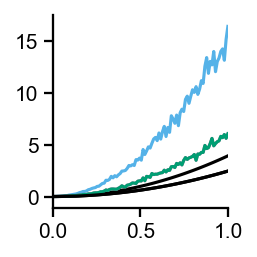

In [33]:
t = 100
trials_n = 100

fig, ax = plt.subplots()

sigmas = np.linspace(0., 1., 100)

for i, (w1s, hs, w2s) in enumerate([[w1s1, hs1, w2s1], [w1s2, hs2, w2s2], [w1s3, hs3, w2s3]]):
    np.random.seed(1)
    w1 = w1s[t]
    w2 = w2s[t]
    responses_mean = []
    responses_std = []
    for sigma in sigmas:
        responses = []
        for trial in range(trials_n):
            noise = np.random.normal(0., sigma, xs.shape)
            responses.append(np.mean(np.linalg.norm(w2 @ w1 @ (xs + noise) - ys, axis=0)**2))
        responses_mean.append(np.mean(responses))
        responses_std.append(np.mean(responses))
    responses_mean = np.asarray(responses_mean)
    responses_std = np.asarray(responses_std)
    ax.plot(sigmas, responses_mean, color=colors[i])
    # ax.fill_between(sigmas, responses_mean - responses_std, responses_mean + responses_std, color=colors[i], alpha=0.2)

    (ys - w2 @ w1 @ xs) @ (ys - w2 @ w1 @ xs).T
    s = np.sum(np.linalg.svd(w2 @ w1)[1])
    ax.plot(sigmas, sigmas**2 * s, c="k")
    

In [293]:
(ys - w2 @ w1 @ xs) @ (ys - w2 @ w1 @ xs).T

array([[12.60612309]])

In [273]:
(w2 @ w1 @ xs - ys).shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 25)

In [115]:
def full_svd(x):
    m, n = x.shape
    u, s, vt = np.linalg.svd(x)
    if m > n:
        s = np.vstack([np.diag(s), np.zeros((len(s), m - n))])
    elif m < n:
        s = np.hstack([np.diag(s), np.zeros((len(s), n - m))])
    else:
        s = np.diag(s)
    return u, s, vt.T

x = np.random.normal(0., 1., (4, 5))
u, s, v = full_svd(x)

In [116]:
np.random.seed(3)

no = 4
ni = 2
nh = 9

xs = np.random.normal(0., 1., (ni, 1))
ys = np.random.normal(0., 1., (no, 1))

w1 = np.random.normal(0., 1., (nh, ni))
w2 = np.random.normal(0., 1., (no, nh))

u, s, v = full_svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))


# !!!
n_dim = 1
s[1, 1] = 0.
# !!!


p = u.T @ w2
q = w1 @ v

if ni > no:
    lmd_ = 2. * np.identity(no)
    gamma = np.random.normal(0., 1., (no, ni-no))
    lmd = np.hstack([lmd_, gamma])
elif ni < no:
    lmd_ = np.diag(np.concatenate([2. * np.ones(n_dim), np.random.normal(0., 1., ni - n_dim)]))
    # gamma = np.random.normal(0., 1., (no-ni, ni))
    gamma = np.zeros((no - ni, ni))
    lmd = np.vstack([lmd_, gamma])

print(s.T @ s)
print(1. / 4 * s.T @ lmd @ lmd.T @ s)
print(1. / 4 * s @ lmd.T @ lmd @ s.T)


[[1.08702229 0.        ]
 [0.         0.        ]]
[[1.08702229 0.        ]
 [0.         0.        ]]
[[1.08702229 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


In [118]:
(u @ u) @ (u @ u).T

array([[ 1.00000000e+00, -6.23926588e-17, -6.33812216e-17,
         3.85706256e-17],
       [-6.23926588e-17,  1.00000000e+00,  7.84913618e-17,
         3.84826023e-17],
       [-6.33812216e-17,  7.84913618e-17,  1.00000000e+00,
        -3.86733282e-17],
       [ 3.85706256e-17,  3.84826023e-17, -3.86733282e-17,
         1.00000000e+00]])

In [119]:
(u @ u).T @ (u @ u)

array([[ 1.00000000e+00,  9.90781430e-17, -7.89583556e-17,
        -1.93822299e-18],
       [ 9.90781430e-17,  1.00000000e+00, -3.18927829e-18,
         1.06337276e-16],
       [-7.89583556e-17, -3.18927829e-18,  1.00000000e+00,
        -6.72376014e-17],
       [-1.93822299e-18,  1.06337276e-16, -6.72376014e-17,
         1.00000000e+00]])

In [96]:
p = np.random.normal(0., 1., (no, nh))
q = np.random.normal(0., 1., (nh, ni))

In [98]:
np.round(lmd @ q.T, 2)

array([[-1.71,  4.32, -2.59,  1.13,  0.3 , -1.46,  0.63, -0.38,  1.45],
       [-0.31,  0.92, -0.08,  1.29, -0.56,  0.68, -0.54, -0.44, -0.72],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [99]:
np.round(p.T @ lmd, 2)

array([[ 2.67, -1.07],
       [-0.39,  0.94],
       [ 3.55, -0.16],
       [-1.35,  1.85],
       [ 0.3 ,  0.51],
       [ 0.31,  0.71],
       [-2.13,  0.67],
       [ 0.88,  0.26],
       [ 3.88, -1.46]])

In [109]:
np.round(lmd @ lmd.T @ p, 2) @ np.round(q @ lmd.T @ lmd, 2)

array([[-53.4275, -11.0176],
       [ 12.0741,   4.8289],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ]])

In [110]:
s

array([[1.04260361, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [108]:
lmd.T @ lmd

array([[4.        , 0.        ],
       [0.        , 1.09861321]])

In [91]:
np.stack([2. * np.ones(n_dim), np.random.normal(0., 1., ni - n_dim)])

array([[2.        ],
       [0.15061687]])

In [87]:
lmd_.T @ lmd_ + gamma.T @ gamma

array([[5.13758576, 1.047613  ],
       [1.047613  , 8.92822156]])

In [86]:
lmd.T @ lmd

array([[5.13758576, 1.047613  ],
       [1.047613  , 8.92822156]])

In [77]:
lmd.T

array([[ 2.        ,  0.        ,  1.04814751, -0.19741468],
       [ 0.        ,  2.        ,  1.33373782,  1.77464503]])

In [78]:
lmd

array([[ 2.        ,  0.        ],
       [ 0.        ,  2.        ],
       [ 1.04814751,  1.33373782],
       [-0.19741468,  1.77464503]])

In [24]:
s.T @ s

array([[1.76098024, 0.        , 0.        , 0.        ],
       [0.        , 0.19499793, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [25]:
s @ s.T

array([[1.76098024, 0.        ],
       [0.        , 0.19499793]])

In [26]:
s

array([[1.32701931, 0.        , 0.        , 0.        ],
       [0.        , 0.4415857 , 0.        , 0.        ]])

In [44]:
np.random.seed(1)

xs = np.random.normal(0., 1., (4, 3))
ys = np.random.normal(0., 1., (2, 3))

w1 = np.random.normal(0., 1., (9, 4))
w1[:, 0:3] = 0
w2 = np.random.normal(0., 1., (2, 9))

a, b, c = compact_svd(w2)
d, e, f = compact_svd(w1)

u, s, v = compact_svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))

In [50]:
c.T @ d

array([[-0.39529235],
       [ 0.07236149]])

In [35]:
(u.T @ a) @ (u.T @ a).T

array([[1.00000000e+00, 1.47982008e-16],
       [1.47982008e-16, 1.00000000e+00]])

In [36]:
(u.T @ a).T @ (u.T @ a)

array([[1.00000000e+00, 2.61288882e-16],
       [2.61288882e-16, 1.00000000e+00]])

In [41]:
(v.T @ f).T @ (v.T @ f)

array([[ 0.91024823, -0.12139967,  0.25186846, -0.05933625],
       [-0.12139967,  0.01902504, -0.02011143,  0.05933584],
       [ 0.25186846, -0.02011143,  0.13381319,  0.22817764],
       [-0.05933625,  0.05933584,  0.22817764,  0.93691353]])

In [42]:
(v.T @ f) @ (v.T @ f).T

array([[1.00000000e+00, 2.85564675e-17],
       [2.85564675e-17, 1.00000000e+00]])

In [267]:
w1 = np.random.normal(0., 1., (6, 4))
w1[:, :2] = 0.
print(np.round(w1, 2))
np.round(np.linalg.pinv(w1) @ w1, 2)

[[ 0.    0.    1.22  0.4 ]
 [ 0.    0.    0.17  0.74]
 [ 0.    0.    0.03 -1.37]
 [ 0.    0.   -0.86  0.35]
 [ 0.    0.   -1.62  1.12]
 [ 0.    0.   -0.78  1.27]]


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [269]:
x = np.random.normal(0., 1., (12, 1))
print(np.linalg.pinv(x))
print(x.T / (x.T @ x))

[[-0.14558102  0.12154338 -0.26717911  0.18721731  0.01087246 -0.04356003
  -0.02375547  0.20286623  0.17520498  0.12361877  0.03215027  0.01816956]]
[[-0.14558102  0.12154338 -0.26717911  0.18721731  0.01087246 -0.04356003
  -0.02375547  0.20286623  0.17520498  0.12361877  0.03215027  0.01816956]]


In [270]:
print(x.T @ x)

[[4.2830497]]


In [272]:
np.linalg.norm(x)**2

4.283049703620531

In [255]:
c = np.linalg.svd(np.random.normal(0., 1., (5, 3)), False)[0]

In [262]:
c @ c.T

array([[ 0.58175373,  0.13849687,  0.42916587, -0.08148069, -0.18251711],
       [ 0.13849687,  0.8983658 , -0.2233405 , -0.03617631, -0.14468449],
       [ 0.42916587, -0.2233405 ,  0.44132889, -0.00837509, -0.11145957],
       [-0.08148069, -0.03617631, -0.00837509,  0.91260606, -0.26784001],
       [-0.18251711, -0.14468449, -0.11145957, -0.26784001,  0.16594552]])

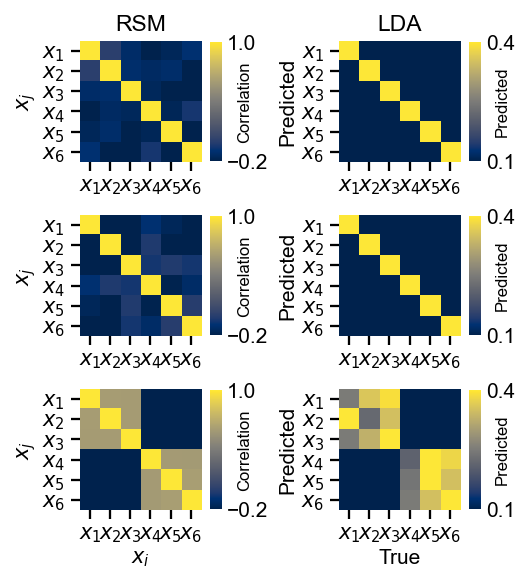

In [248]:
shrink = 0.98

fig, axss = plt.subplots(3, 2, figsize=(1.7*2, 1.7*2.22))
for i, (w1s, hs, w2s) in enumerate([[w1s1, hs1, w2s1], [w1s2, hs2, w2s2], [w1s3, hs3, w2s3]]):
    axs = axss[i]
    ax = axs[0]
    mean = 0.
    for j in range(steps):
        hs_ = hs[j] + np.random.normal(0., 0.3, hs[j].shape)
        mean += np.corrcoef(hs_.T @ hs_)
    mean /= steps
    cbax = ax.imshow(mean, vmin=-0.2, vmax=1.)
    ax.set_xticks(range(6))
    ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])
    ax.set_yticks(range(6))
    ax.set_yticklabels([f"$x_{i+1}$" for i in range(6)])
    ax.spines[["bottom", "left"]].set_visible(False)
    if i == 0:
        ax.set_title("RSM")
    if i == 2:
        ax.set_xlabel("$x_i$")
    ax.set_ylabel("$x_j$")

    cb = fig.colorbar(cbax, shrink=shrink, aspect=10, pad=0.05)
    cb.outline.set_visible(False)
    cb.set_ticks([-0.2, 1])
    cb.ax.tick_params(length=0)
    cb.set_label("Correlation", labelpad=-15., fontsize=8)

    ax = axs[1]
    samples_n = 100
    hs_ = np.hstack([hs[-1] + np.random.normal(0., 0.3, hs[-1].shape) for _ in range(samples_n)])
    y_label = np.hstack([range(xs.shape[-1]) for _ in range(samples_n)])
    model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
    model.fit(hs_.T, y_label)
    hs_ = np.hstack([hs[-1] + np.random.normal(0., 0.3, hs[-1].shape) for _ in range(samples_n)])
    y_pred = model.predict(hs_.T)

    cbax = ax.imshow(confusion_matrix(y_label, y_pred) / samples_n, vmin=0.1, vmax=0.4)
    ax.set_xticks(range(6))
    ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])
    ax.set_yticks(range(6))
    ax.set_yticklabels([f"$x_{i+1}$" for i in range(6)])
    ax.spines[["bottom", "left"]].set_visible(False)
    if i == 0:
        ax.set_title("LDA")
    if i == 2:
        ax.set_xlabel("True")
    ax.set_ylabel("Predicted")

    cb = fig.colorbar(cbax, shrink=shrink, aspect=10, pad=0.05)
    cb.outline.set_visible(False)
    cb.set_ticks([0.1, 0.4])
    cb.ax.tick_params(length=0)
    cb.set_label("Predicted", labelpad=-10., fontsize=8)

plt.savefig(f"./figures/2/h.svg", dpi=300)

In [ ]:
    
    if np.std(network_norm) > 1e-5:
        # ax.plot((network_norm - np.mean(network_norm)) / np.std(network_norm), c=colors[1], label="$||W_2W_1||_F^2$")
        
    else:
        ax.plot(np.zeros_like(network_norm), label="$||W_2W_1||_F^2$")
    
    if np.std(summed_norm) > 1e-5:
        #ax.plot((summed_norm - np.mean(summed_norm)) / np.std(summed_norm), c=colors[0], label="$||W_1||_F^2 + ||W_2||_F^2$")
        
    else:
        ax.plot(np.zeros_like(summed_norm), label="$||W_1||_F^2 + ||W_2||_F^2$")

In [ ]:
def diffusion_plot(w1s, w2s, hs, step_size=10, letter="x"):
    np.random.seed(1)
    
    fig, axs = plt.subplots(1, 3, figsize=(1.6*3, 1.45))
    
    ax = axs[0]
    w = ys @ hs[0].T @ np.linalg.pinv(hs[0] @ hs[0].T)
    ax.plot(np.mean((np.einsum("ab,cbd->cd", w, hs) - ys)**2, axis=1), c=colors[0])
    ax.set_title("Decoding Error")
    ax.set_ylabel("$\mathcal{L}_{MSE}$")
    ax.set_xlabel("Diffusion Step")
    
    ax = axs[1]
    similarities = squareform(pdist(hs[::step_size].swapaxes(1, 2).reshape(-1, hidden_dim), "euclidean"))
    embedding = MDS(n_components=2, dissimilarity="precomputed", eps=0.1, n_jobs=4, random_state=1, normalized_stress="auto")
    mds = embedding.fit_transform(similarities).reshape(-1, 6, 2)
    for step in range(steps-1):
        for i in range(6):
            ax.plot(mds[step:step+2, i, 0], mds[step:step+2, i, 1], c=odours[i])
    if np.max(mds) > 2:
        ax.set_xlim(-3.1, 3.1)
        ax.set_ylim(-3.1, 3.1)
        ax.set_xticks([-2, 0, 2])
        ax.set_yticks([-2, 0, 2])
    else:
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel("Dim 1")
    ax.set_ylabel("Dim 2")
    ax.set_title("Hidden")
    
    ax = axs[2]
    network_norm = np.linalg.norm(np.einsum("abc,adb->adc", w1s, w2s), ord="fro", axis=(1,2))**2
    if np.std(network_norm) > 1e-5:
        ax.plot((network_norm - np.mean(network_norm)) / np.std(network_norm), c=colors[1], label="$||W_2W_1||_F^2$")
    else:
        ax.plot(np.zeros_like(network_norm), c=colors[4], label="$||W_2W_1||_F^2$")
    summed_norm = np.linalg.norm(w1s, ord="fro", axis=(1,2))**2 + np.linalg.norm(w2s, ord="fro", axis=(1,2))**2
    if np.std(summed_norm) > 1e-5:
        ax.plot((summed_norm - np.mean(summed_norm)) / np.std(summed_norm), c=colors[0], label="$||W_1||_F^2 + ||W_2||_F^2$")
    else:
        ax.plot(np.zeros_like(summed_norm), c=colors[5], label="$||W_1||_F^2 + ||W_2||_F^2$")
    ax.set_ylim(-6.1, 4.1)
    ax.set_yticks([-2.5, 0, 2.5])
    ax.set_xlabel("Diffusion Step")
    ax.set_ylabel("Normalised Norm")
    leg = ax.legend(loc=[0., -0.025], fontsize=8., facecolor="white", framealpha=0.8, frameon=False)
    leg.get_frame().set_linewidth(0.0)
    ax.set_title("Norms")

    """
    ax = axs[3]
    mean = 0.
    for i in range(steps):
        hs_ = hs[i] + np.random.normal(0., 0.3, hs[i].shape)
        mean += np.corrcoef(hs_.T @ hs_)
    mean /= steps
    cbax = ax.imshow(mean, vmin=-0.2, vmax=1.)
    ax.set_xticks(range(6))
    ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])
    ax.set_yticks(range(6))
    ax.set_yticklabels([f"$x_{i+1}$" for i in range(6)])
    ax.spines[["bottom", "left"]].set_visible(False)
    ax.set_title("RSM")
    ax.set_xlabel("$x_i$")
    ax.set_ylabel("$x_j$")

    cb = fig.colorbar(cbax, shrink=.87, aspect=10, pad=0.05)
    cb.outline.set_visible(False)
    cb.set_ticks([-0.2, 1])
    cb.ax.tick_params(length=0)
    cb.set_label("Correlation", labelpad=-15., fontsize=8)

    ax = axs[4]
    samples_n = 100
    hs_ = np.hstack([hs[-1] + np.random.normal(0., 0.3, hs[-1].shape) for _ in range(samples_n)])
    y_label = np.hstack([range(xs.shape[-1]) for _ in range(samples_n)])
    model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
    model.fit(hs_.T, y_label)
    hs_ = np.hstack([hs[-1] + np.random.normal(0., 0.3, hs[-1].shape) for _ in range(samples_n)])
    y_pred = model.predict(hs_.T)

    cbax = ax.imshow(confusion_matrix(y_label, y_pred) / samples_n, vmin=0.1, vmax=0.4)
    ax.set_xticks(range(6))
    ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])
    ax.set_yticks(range(6))
    ax.set_yticklabels([f"$x_{i+1}$" for i in range(6)])
    ax.spines[["bottom", "left"]].set_visible(False)
    ax.set_title("LDA")
    ax.set_xlabel("True Odour")
    ax.set_ylabel("Predicted Odour")

    cb = fig.colorbar(cbax, shrink=.87, aspect=10, pad=0.05)
    cb.outline.set_visible(False)
    cb.set_ticks([0.1, 0.4])
    cb.ax.tick_params(length=0)
    cb.set_label("Predicted", labelpad=-10., fontsize=8)
    """
    
    plt.savefig(f"./figures/2/{letter}.svg", dpi=300)

diffusion_plot(w1s, w2s, hs, letter="g")

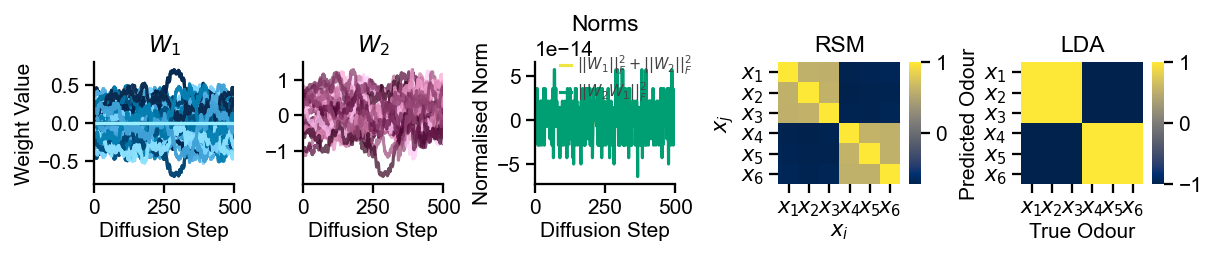

In [624]:
fig, axs = plt.subplots(1, 5, figsize=(1.6*5, 1.6))
ax = axs[0]
ax.set_prop_cycle(cycler(color=blues))
ax.plot(w1s.reshape(steps, -1), alpha=0.7)
#ax.set_ylim(-1.2, 1.2)
ax.set_title("$W_1$")
ax.set_ylabel("Weight Value")
ax.set_xlabel("Diffusion Step")

ax = axs[1]
ax.set_prop_cycle(cycler(color=reds))
ax.plot(w2s.reshape(steps, -1), alpha=0.7)
#ax.set_ylim(-4., 4.)
#ax.set_yticks([-3, 0, 3])
#ax.set_ylim(-1.2, 1.2)
ax.set_title("$W_2$")
ax.set_xlabel("Diffusion Step")
    
ax = axs[2]
summed_norm = np.linalg.norm(w1s, ord="fro", axis=(1,2))**2 + np.linalg.norm(w2s, ord="fro", axis=(1,2))**2
ax.plot(summed_norm - np.mean(summed_norm), c=colors[3], label="$||W_1||_F^2 + ||W_2||_F^2$")
network_norm = np.linalg.norm(np.einsum("abc,adb->adc", w1s, w2s), ord="fro", axis=(1,2))**2
ax.plot(network_norm - np.mean(network_norm), c=colors[2], label="$||W_2W_1||_F^2$")
ax.set_xlabel("Diffusion Step")
ax.set_ylabel("Normalised Norm")
ax.legend(loc=[.125, 0.6], fontsize=7)
ax.set_title("Norms")
ax.plot(np.sum((np.einsum("abc,adb->adc", w1s, w2s) @ xs @ xs.T - ys @ xs.T), axis=(1, 2)), c=colors[2])

mean = 0.
for i in range(steps):
    hs_ = hs[i] + np.random.normal(0., 0.3, hs[i].shape)
    mean += np.corrcoef(hs_.T @ hs_)
mean /= steps
ax = axs[3]
cbax = ax.imshow(mean)
ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])
ax.set_yticks(range(6))
ax.set_yticklabels([f"$x_{i+1}$" for i in range(6)])
ax.spines[["bottom", "left"]].set_visible(False)
ax.set_title("RSM")
ax.set_xlabel("$x_i$")
ax.set_ylabel("$x_j$")

cb = fig.colorbar(cbax, shrink=1., aspect=10, pad=0.05)
cb.outline.set_visible(False)

ax = axs[4]
cbax = ax.imshow(xs.T @ w1.T @ w1 @ xs)
ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])
ax.set_yticks(range(6))
ax.set_yticklabels([f"$x_{i+1}$" for i in range(6)])
ax.spines[["bottom", "left"]].set_visible(False)
ax.set_title("LDA")
ax.set_xlabel("True Odour")
ax.set_ylabel("Predicted Odour")

cb = fig.colorbar(cbax, shrink=1., aspect=10, pad=0.05)
cb.outline.set_visible(False)

In [154]:
step_size = 5
similarities = squareform(pdist(hs.swapaxes(1, 2).reshape(-1, hidden_dim), "euclidean"))
embedding = MDS(n_components=2, dissimilarity="precomputed", eps=0.1, n_jobs=4, random_state=1, normalized_stress="auto")
mds = embedding.fit_transform(similarities).reshape(-1, 6, 2)


Text(0.5, 1.0, 'Hidden')

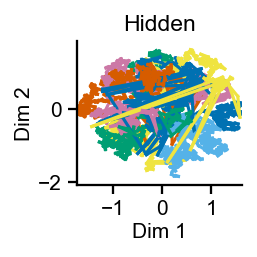

In [155]:
fig, ax = plt.subplots()
for step in range(steps-1):
    for i in range(6):
        ax.plot(mds[step:step+2, i, 0], mds[step:step+2, i, 1], c=colors[i]) # , alpha=0.1 + 0.8 * step / steps
        
#for i in range(6):
#    ax.plot(mds[:, i, 0], mds[:, i, 1], c=colors[i]) # , alpha=0.1 + 0.8 * step / steps

#ax.set_xlim(-2.1, 2.1)
#ax.set_ylim(-2.1, 2.1)
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Hidden")

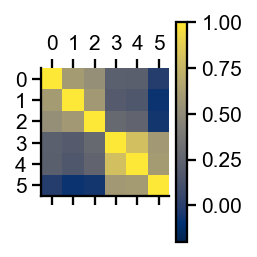

In [543]:
fig, ax = plt.subplots()
data = """1	0.599732106435705	0.522830034223153	0.222045427182833	0.217830018729568	-0.0133054392856377
0.599732106435705	1	0.586233215059026	0.193229554683793	0.162414725385535	-0.0765674151896875
0.522830034223153	0.586233215059026	1	0.286583262346625	0.251185421634389	-0.0594038234957483
0.222045427182833	0.193229554683793	0.286583262346625	1	0.802187780983927	0.587340754326303
0.217830018729568	0.162414725385535	0.251185421634389	0.802187780983927	1	0.600151353473822
-0.0133054392856377	-0.0765674151896875	-0.0594038234957483	0.587340754326303	0.600151353473822	1"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = ax.matshow(data, vmin=-.2, vmax=1.)
fig.colorbar(ax)

Text(4, 0.5, 'S+')

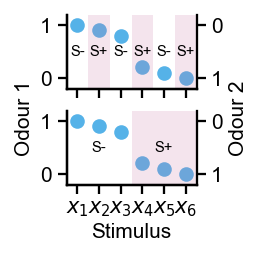

In [130]:
xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.],
    np.zeros(6)
]) / 100.

fig, axs = plt.subplots(2, 1, figsize=(1.6, 1.6), sharex=True, sharey=True, constrained_layout=True)

for i in range(2):
    ax = axs[i]
    ax.scatter(range(6), xs[0], zorder=0)
    # ax.scatter(range(6), xs[1], zorder=0)
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.2, 1.2)
    ax.set_yticks([0, 1])
    ax.set_yticklabels([0, 1])
    
    ax.spines['right'].set_visible(True)
    ax2 = ax.twinx()
    ax2.set_ylim(1.2, -0.2)
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels([0, 1])

ax = axs[0]
for i in range(1, 7, 2):
    ax.axvspan(i-0.5, i+0.5, color=colors[1], alpha=0.2, zorder=0, lw=0)
    ax.text(i, 0.5, "S+", ha="center", va="center", fontsize=7)
for i in range(0, 6, 2):
    ax.text(i, 0.5, "S-", ha="center", va="center", fontsize=7)

ax = axs[1]
ax.axvspan(2.5, 6.5, color=colors[1], alpha=0.2, zorder=0, lw=0)
ax.set_xlabel("Stimulus")
ax.set_xticks(range(6))
ax.set_xticklabels([f"$x_{i+1}$" for i in range(6)])

ax.set_ylabel("Odour 1")
ax.yaxis.set_label_coords(-.25, .9)
ax2.set_ylabel("Odour 2")
ax2.yaxis.set_label_coords(1.25, .9)

ax.text(1, 0.5, "S-", ha="center", va="center", fontsize=7)
ax.text(4, 0.5, "S+", ha="center", va="center", fontsize=7)

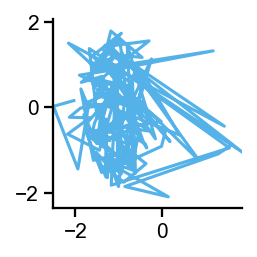

In [450]:
fig, ax = plt.subplots()
ax.plot(mds[0:1, 0, 0])
for i in range(1):
    ax.plot(mds[:, i, 0], mds[:, i, 1], c=colors[i])

Text(0.5, 1.0, 'Hidden Representation')

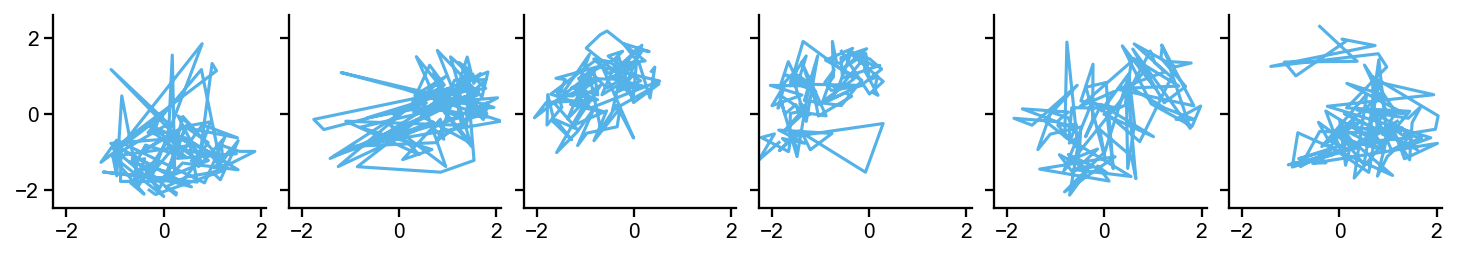

In [439]:
fig, axs = plt.subplots(1, 6, figsize=(1.6*6, 1.6), sharex=True, sharey=True)
for i in range(6):
    axs[i].plot(mds[:, i, 0], mds[:, i, 1])

#ax.set_xlim(-2.1, 2.1)
#ax.set_ylim(-2.1, 2.1)
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Hidden Representation")

In [ ]:
# Diffusion on least squares solution manifold
np.random.seed(1)

alpha = 0.0125

u_, s_, v_ = compact_svd(1. / 6. * ys @ xs.T @ np.linalg.pinv(1. / 6. * xs @ xs.T))

q = np.random.normal(0., .5, (hidden_dim, s_.shape[0]))
w2_null = np.random.normal(0., 1., (out_dim, hidden_dim))

w1s = []
w2s = []
hs = []
eta = 0.1
for i in range(steps):
    q = (1. - alpha) * q + alpha * np.random.normal(0., 6., (hidden_dim, s_.shape[0]))
    w1 = q @ np.sqrt(s_) @ v_.T
    
    qinv = np.linalg.pinv(q)
    h, _, _ = compact_svd(w1 @ xs @ xs.T)
    w2_null = (1. - alpha) * w2_null + alpha * np.random.normal(0., 6., (out_dim, hidden_dim))
    w2 = u_ @ np.sqrt(s_) @ qinv + w2_null @ (np.identity(h.shape[0]) - h @ h.T)
    
    w1s.append(w1)
    hs.append(w1 @ (xs + np.random.normal(0., 0.05, (xs.shape))))
    w2s.append(w2)

w1s = np.asarray(w1s)
hs = np.asarray(hs)
w2s = np.asarray(w2s)

In [90]:
ys

array([[-1.,  1., -1.,  1., -1.,  1.]])

In [76]:
u, s, vt = np.linalg.svd(w1 @ xs, False)
print(np.round(s, 2))
np.round(u[:, 2:] @ u[:, 2:].T @ w1 @ xs, 2)

[1.56 1.37 0.   0.   0.   0.  ]


array([[-0., -0., -0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       [ 0.,  0.,  0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0.,  0.,  0.,  0.],
       [-0., -0., -0., -0., -0., -0.],
       [-0., -0., -0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [78]:
w1.shape

(10, 2)

In [77]:
u, s, vt = np.linalg.svd(w1, False)
print(np.round(s, 2))

[1.05 0.83]


In [75]:
np.round(u[:, 2:].T @ w1 @ xs, 2)

array([[-0., -0., -0.,  0.,  0.,  0.],
       [ 0., -0., -0., -0., -0., -0.],
       [-0., -0., -0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0.,  0.,  0.]])

In [73]:
np.round(u[:, 2:].T @ w1, 2)

array([[-0.,  0.],
       [ 0., -0.],
       [-0.,  0.],
       [-0.,  0.]])

In [68]:
(w1 @ xs).shape

(10, 6)

/tmp/ipykernel_578829/1848352266.py:34: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()


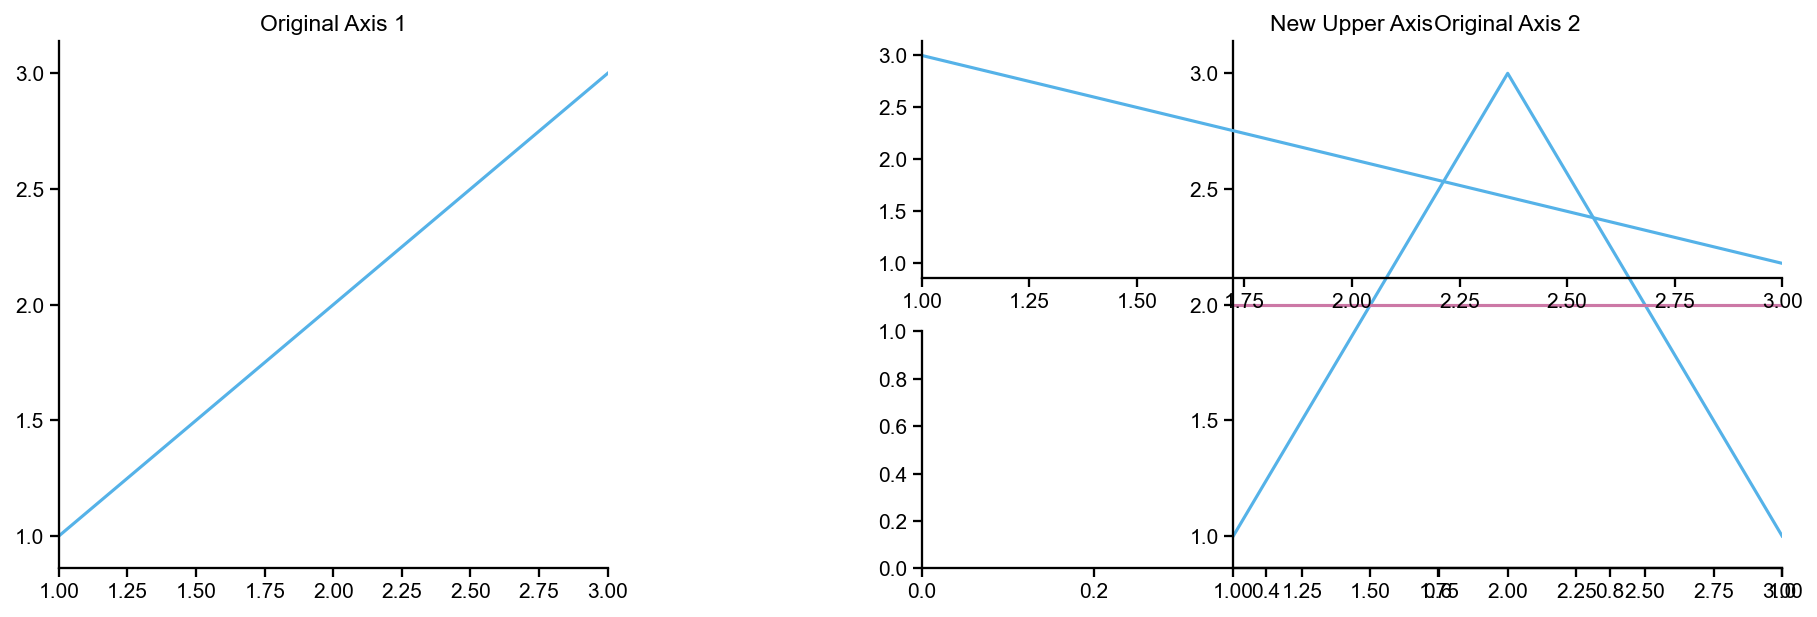

In [208]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure and a set of subplots with horizontal arrangement
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Make the subplots in the second column (axs[1]) vertically split
gs = gridspec.GridSpec(2, 2, figure=fig, width_ratios=[1, 1])

# Remove the existing axis that you want to split
fig.delaxes(axs[1])

# Add new axes for the vertical split
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

# Keep the remaining axes
ax0 = axs[0]
ax2 = axs[2]

# Plotting some example data
ax0.plot([1, 2, 3], [1, 2, 3], label='Original 1')
ax1.plot([1, 2, 3], [3, 2, 1], label='New Upper')
ax2.plot([1, 2, 3], [1, 3, 1], label='New Lower')
ax2.plot([1, 2, 3], [2, 2, 2], label='Original 2')

# Adding labels and titles to the plots
ax0.set_title('Original Axis 1')
ax1.set_title('New Upper Axis')
ax2.set_title('New Lower Axis')
ax2.set_title('Original Axis 2')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show plot
plt.show()

In [66]:
w1.shape

(10, 2)

In [64]:
s

array([1.56229948e+00, 1.37264792e+00, 1.15830031e-16, 7.52590083e-17,
       5.38550712e-17, 3.17814387e-17])

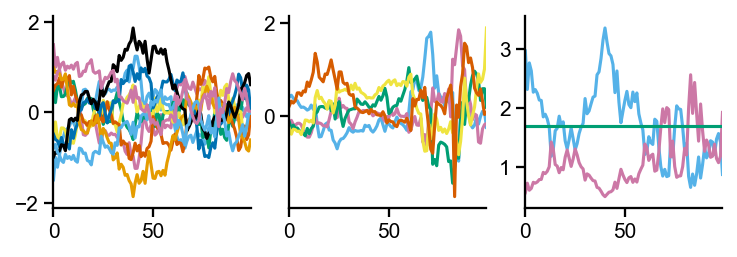

In [329]:
np.random.seed(1)

u, s, vt = np.linalg.svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T), False)

q = np.random.normal(0., 1., (hidden_dim, np.min([in_dim, out_dim])))
qinv = np.linalg.pinv(q)
alpha = 0.05

w1s = []
w2s = []
for i in range(steps):
    w1 = q @ np.diag(np.sqrt(s)) @ vt
    w2 = u @ np.diag(np.sqrt(s)) @ qinv
    
    q = (1. - alpha) * q + alpha * np.random.normal(0., 4., q.shape)
    qinv = np.linalg.pinv(q)
    w1s.append(w1)
    w2s.append(w2)

w1s = np.asarray(w1s)
w2s = np.asarray(w2s)

fig, axs = plt.subplots(1, 3, figsize=(1.6*3, 1.6))
ax = axs[0]
ax.plot(w1s.reshape(steps, -1))

ax = axs[1]
ax.plot(w2s.reshape(steps, -1))

ax = axs[2]
ax.plot(np.linalg.norm(w1s, ord="fro", axis=(1,2)))
ax.plot(np.linalg.norm(w2s, ord="fro", axis=(1,2)))
ax.plot(np.linalg.norm(np.einsum("abc,adb->adc", w1s, w2s), ord="fro", axis=(1,2)))

In [328]:
xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.]
]) / 100.

ys = np.ones((1, 6))
ys[:, :3] = -1.

u, s, vt = np.linalg.svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T), True)

s = np.diag([s[0], 0.])

s @ vt @ xs @ xs.T


array([[-2.4,  2.4],
       [ 0. ,  0. ]])

In [324]:
vt

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [326]:
u.shape

(1, 1)

In [245]:
w1s.shape

(1000, 5, 2)

In [246]:
w2s.shape

(1000, 1, 5)

array([[[-1.2,  1.2]],

       [[-1.2,  1.2]],

       [[-1.2,  1.2]],

       ...,

       [[-1.2,  1.2]],

       [[-1.2,  1.2]],

       [[-1.2,  1.2]]])

In [180]:
vt

array([[-0.70710678,  0.70710678,  0.        ]])

In [ ]:



ys[0, :3] = -1.

u, s, vt = np.linalg.svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T), False)

fig, ax = plt.subplots()
ax.matshow(u @ np.diag(s) @ vt)


In [ ]:
def svd(x):
    u, s, vt = np.linalg.svd(x)
    print(u.shape, s.shape, vt.shape)

In [ ]:
svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T))


u, s, vt = np.linalg.svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T), False)

print(u @ np.diag(s) @ vt @ xs @ xs.T)
print(ys @ xs.T)


u, s, vt = np.linalg.svd(ys @ xs.T @ np.linalg.pinv(xs @ xs.T), True)
s = np.asarray([[s[0], 0.5]])
print(u @ s @ vt @ xs @ xs.T)
print(ys @ xs.T)

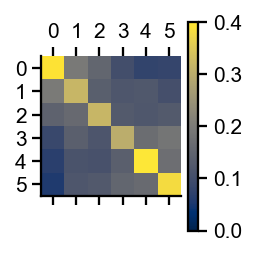

In [112]:
fig, ax = plt.subplots()
data 
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = ax.matshow(data, vmin=0., vmax=0.4)
fig.colorbar(ax)

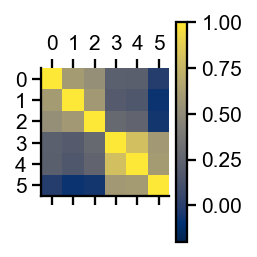

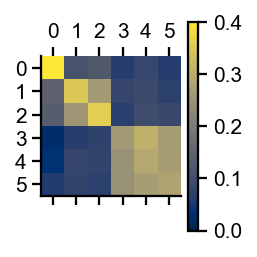

In [111]:
fig, ax = plt.subplots()
data = """0.56	0.11	0.12333333	0.06333333	0.08333333	0.06
0.14666667	0.35	0.26333333	0.08	0.09	0.07
0.13333333	0.25666667	0.36	0.06666667	0.09666667	0.08666667
0.02666667	0.06333333	0.07333333	0.26	0.30666667	0.27
0.03666667	0.08	0.07666667	0.24666667	0.29	0.27
0.05666667	0.07666667	0.07	0.24666667	0.27	0.28"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = ax.matshow(data, vmin=0., vmax=0.4)
fig.colorbar(ax)

In [227]:
np.random.seed(1)

X = np.linalg.svd(np.random.normal(0., 1., (5, 5)))[0]

x_ = X[:, [0]]

print(X)
print(x_)
print(X @ x_)

[[-0.42501696  0.27320454  0.05174593  0.8551932   0.10337701]
 [ 0.61604378  0.44274302 -0.21688757  0.24590141 -0.56299286]
 [-0.56593484  0.43017644  0.25681173 -0.36882926 -0.54099787]
 [ 0.12772785  0.73740115 -0.00952864 -0.24596981  0.61590032]
 [ 0.3213316  -0.02292756  0.94033988  0.10789303  0.01844844]]
[[-0.42501696]
 [ 0.61604378]
 [-0.56593484]
 [ 0.12772785]
 [ 0.3213316 ]]
[[ 0.46211084]
 [-0.01583468]
 [ 0.13925124]
 [ 0.57186852]
 [-0.66315784]]


In [228]:
x_ * x_*-1

array([[-0.18063942],
       [-0.37950994],
       [-0.32028224],
       [-0.0163144 ],
       [-0.10325399]])

In [229]:
X @ x_**2

array([[0.06810838],
       [0.1557224 ],
       [0.08140092],
       [0.35945322],
       [0.35418317]])

In [222]:
x_**2

array([[0.18063942],
       [0.37950994],
       [0.32028224],
       [0.0163144 ],
       [0.10325399]])

array([[ 0.46211084],
       [-0.01583468],
       [ 0.13925124],
       [ 0.57186852],
       [-0.66315784]])